데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

5장<br>
목차<br>
1. Transformation on y
2. Transformation on x

# 1. Generalized Least Squares

Constant variance 가정: $var(\mathbf{\epsilon})=\sigma^{2} \mathbf{I}$<br>
Constant variance 가정 성립 안할 때: $var(\mathbf{\epsilon})=\sigma^{2} \mathbf{V}$, 여기서 $\mathbf{V}$는 known, uncorrelated(diagonal)<br>
=> Constant variance 가정 성립 안할 때 Variance에 대한 추가적인 가정

$\mathbf{V}$ nonsingluar and positive definite => $\mathbf{V}=\mathbf{K}^{'}\mathbf{K}=\mathbf{K}\mathbf{K}$인 nonsingular symmetric $\mathbf{K}$ 존재<br>
$\hat{ \mathbf{\beta} }_{GLS}=(\mathbf{X}^{'}\mathbf{V}^{-1}\mathbf{X})^{-1}\mathbf{X}^{'}\mathbf{V}^{-1}\mathbf{y}$<br>
$Var(\hat{ \mathbf{\beta} }_{GLS})=\sigma^{2}(\mathbf{X}^{'}\mathbf{V}^{-1}\mathbf{X})^{-1}$<br>
 $var(\mathbf{\epsilon})=\sigma^{2} \mathbf{V}$ 일 때 $\hat{ \mathbf{\beta} }_{GLS}$는 BLUE (Best linear unbiased estimator) of $\mathbf{\beta}$

# 2. Weighted Least Squares

$\mathbf{W}=\mathbf{V}^{-1}$<br>
$diag(\frac{1}{w_{1}},..,\frac{1}{w_{n}})$<br>
WLS를 사용하기 위해서는 $\frac{1}{w_{1}},..,\frac{1}{w_{n}}$가 known이어야 됨<br>
1) 산업에 대한 지식 사용<br>
2) Residual analysis를 통해 $Var(\epsilon_{i})=\sigma^{2}x_{ij}=>w_{i}=\frac{1}{x_{ij}}$와 같은 단서를 찾음

In [1]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [2]:
df<-read.csv('./Restaurant_Food_Sales.csv')
colnames(df)<-c('Income','Expense')

In [3]:
df

Income,Expense
81464,3000
72661,3150
72344,3085
90743,5225
98588,5350
96507,6090
126574,8925
114133,9015
115814,8885
123181,8950


Restaurant Food Sales data<br>
음식 판매로 인한 30개 음식점의 월평균 수입<br>
<br>
Y:음식 판매로 매달 평균 수입<br>
X:이에 상응하는 30개 음식점의 연 광고비 지출<br>

In [4]:
fit<-lm(Income~Expense,data=df)

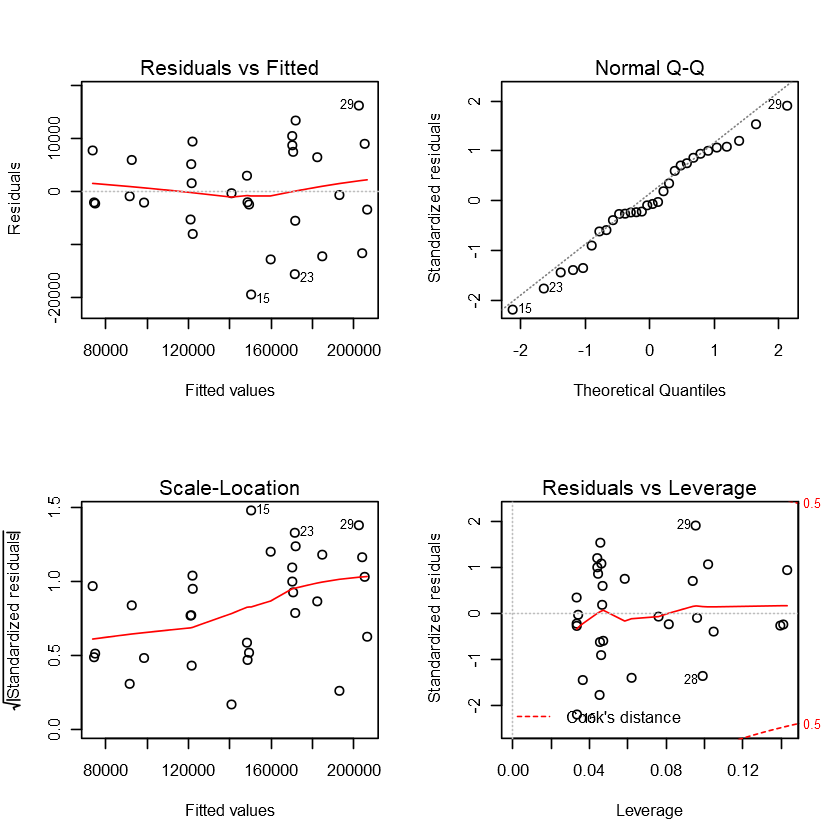

In [5]:
par(mfrow=c(2,2))
plot(fit)

Fitted value와 residual이 점점 퍼지는 것으로 보아 constant variance assumption이 성립 안함<br>
원래 데이터를 봤을 때 데이터의 몇개 군집이 있어 보임(near neighbor로 보임)

In [6]:
Cluster<-list(c(1:3),c(4:5),c(6),c(7:11),c(12:16),c(17:22),c(23),c(24:25),c(26),c(27:30))

In [7]:
n<-length(Cluster)
n

[1] 10

In [8]:
Cluster_mean<-rep(0,n)
Cluster_sd<-rep(0,n)

for (i in 1:n){
    Cluster_mean[i]<-mean(df$Expense[Cluster[[i]] ])
    Cluster_sd[i]<-sd(df$Income[Cluster[[i]] ])^2
       
}


In [10]:
Cluster_mean
Cluster_sd

[1]  3078.333  5287.500  6090.000  8955.000 12171.000 14853.333 15150.000
 [8] 16650.000 17830.000 19262.500

[1]  26794616  30772013        NA  52803695  62189475 198811359        NA
 [8] 132388992        NA 138856871

$\hat{s}_{y}^{2}=\hat{\beta_{0}}+\hat{\beta_{1}}\bar{x}$<br>
클러스터의 분산과 분평으로 회귀분석 적합

In [9]:
df_sd_mean<-na.omit(cbind(Cluster_mean,Cluster_sd))
df_sd_mean<-data.frame(df_sd_mean)
df_sd_mean[,1]<-round(df_sd_mean[,1],1)
df_sd_mean

Cluster_mean,Cluster_sd
3078.3,26794616
5287.5,30772013
8955.0,52803695
12171.0,62189475
14853.3,198811359
16650.0,132388992
19262.5,138856871


In [12]:
fit_sd<-lm( Cluster_sd ~Cluster_mean,data=df_sd_mean)

In [13]:
summary(fit_sd)


Call:
lm(formula = Cluster_sd ~ Cluster_mean, data = df_sd_mean)

Residuals:
        1         2         3         4         5         6         7 
 10826227  -5171474 -16300514 -35993094  76376028  -6291702 -23445470 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -11864917   35051378  -0.339   0.7487  
Cluster_mean      9042       2753   3.284   0.0219 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40320000 on 5 degrees of freedom
Multiple R-squared:  0.6833,	Adjusted R-squared:  0.6199 
F-statistic: 10.79 on 1 and 5 DF,  p-value: 0.02185


x 값에 따라 군집을 나눴을 때 y의 분산이 x값에 따라 어떻게 변하는지 살펴 봄 <br>
클러스터 평균 $\bar{x}$이 $s_{y}^{2}$와 근사적으로 linear 함<br>
=> 클러스터마다 분산의 특징이 다르기 때문에 WLS 사용<br>
=> $w=\frac{1}{s_{y}^{2}}$로 설정

In [14]:
Weights<-1/predict(fit_sd, newdata=data.frame(Cluster_mean=df$Expense))

In [15]:
fit_wls<-lm(Income~Expense,data=df,weights=Weights)

In [16]:
summary(fit)
summary(fit_wls)


Call:
lm(formula = Income ~ Expense, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-19354.0  -4740.3   -704.7   7294.8  16281.3 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.950e+04  4.278e+03   11.57 3.49e-12 ***
Expense     8.049e+00  3.257e-01   24.71  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8976 on 28 degrees of freedom
Multiple R-squared:  0.9562,	Adjusted R-squared:  0.9546 
F-statistic: 610.8 on 1 and 28 DF,  p-value: < 2.2e-16



Call:
lm(formula = Income ~ Expense, data = df, weights = Weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.9172 -0.7578 -0.1127  0.7638  1.7034 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.104e+04  2.395e+03   21.31   <2e-16 ***
Expense     7.922e+00  2.495e-01   31.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9192 on 28 degrees of freedom
Multiple R-squared:  0.973,	Adjusted R-squared:  0.972 
F-statistic:  1008 on 1 and 28 DF,  p-value: < 2.2e-16


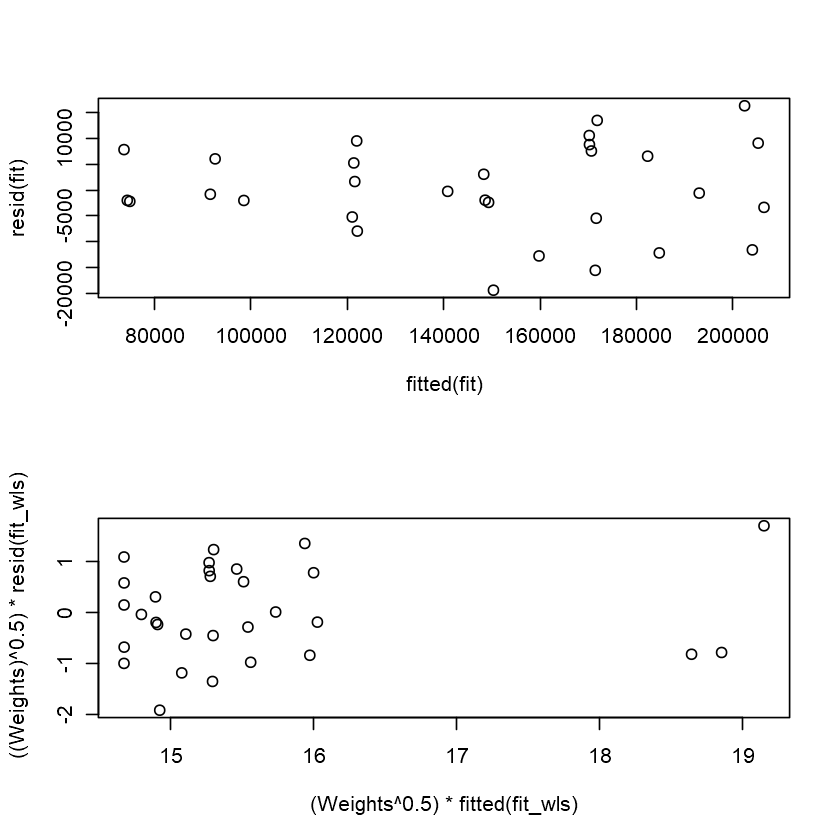

In [20]:
par(mfrow=c(2,1))
plot(fitted(fit),resid(fit))
plot((Weights^0.5)*fitted(fit_wls),((Weights)^0.5)*resid(fit_wls))

$w_{i}^{1/2}e_{i}$ vs $w_{i}^{1/2}\hat{y}_{i}$ plot 확인<br>

- OLS fit 보다 나음 <br>

WLS 사용시 주의점<br>
- 변수가 많으면 이러한 클러스터 분석 시각적으로 보기 어려운 문제 있음<br>
- weight 추정할 때 x 값이 작으면 음수가 생길 수 있음
- weight가 합리적인지 확인